In [1]:
import mdtraj as md
import pickle
import numpy as np
from matplotlib import pyplot as plt
from simtk import openmm, unit
from tqdm import tqdm

In [2]:
def plot_dihedrals(dihedrals, outfile=None):
    # Plot histogram with error bars : https://stackoverflow.com/questions/35390276/how-to-add-error-bars-to-histogram-diagram-in-python
    entries, edges, _ = plt.hist(dihedrals)
    bin_centers = 0.5 * (edges[:-1] + edges[1:]) # calculate bin centers
    plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.') # draw errobars, use the sqrt error
    plt.xlim(-np.pi, np.pi)
#     plt.savefig(outfile, dpi=300)
#     plt.close()
    plt.show()

def plot_time_series(dihedrals, n_iter, outfile=None):
    from perses.dispersed import feptasks
    t0, g, neff_max, a_t, uncorrelated_indices = feptasks.compute_timeseries(dihedrals)

    plt.scatter(range(n_iter), dihedrals)
    plt.ylabel("dihedral")
    plt.xlabel("iteration number")
    plt.ylim(-np.pi, np.pi)
#     plt.savefig(outfile, dpi=300)
#     plt.close()
    plt.show()

    return uncorrelated_indices

def plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices, outfile=None):
    # Plot histogram with error bars : https://stackoverflow.com/questions/35390276/how-to-add-error-bars-to-histogram-diagram-in-python
    entries, edges, _ = plt.hist(dihedrals[uncorrelated_indices])
    bin_centers = 0.5 * (edges[:-1] + edges[1:]) # calculate bin centers
    plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.') # draw errobars, use the sqrt error
    plt.xlim(-np.pi, np.pi)
#     plt.savefig(outfile, dpi=300)
#     plt.close()
    plt.show()


## Analyze vanilla MD dihedrals run on og-htf with flattened

In [25]:
with open("/data/chodera/zhangi/perses_benchmark/neq/7/45/45_solvent.pickle", 'rb') as f:
    htf = pickle.load(f)

In [26]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/7/45/45_solvent_equil_hybrid_0_20ns.npy", 'rb') as f:
    pos = np.load(f)


In [27]:
pos[2499]

array([[ 2.21396471, -0.12593522,  1.92670913],
       [ 2.20366353, -0.05550556,  2.00925941],
       [ 2.29702885, -0.05520807,  2.06550734],
       ...,
       [ 2.54283703,  0.24272646,  1.87909005],
       [ 2.51311052,  0.21668357,  1.70314511],
       [ 2.50519612,  0.38465966,  1.77609248]])

In [28]:
htf._topology_proposal.old_topology

<Topology; 3 chains, 512 residues, 1549 atoms, 1039 bonds>

In [29]:
# Get old positions from hybrid
pos_old = np.empty(shape=(2500, htf._topology_proposal.old_topology.getNumAtoms(), 3))
for i, p in tqdm(enumerate(pos[:2500])):
    pos_old[i] = htf.old_positions(p *unit.nanometers)

2500it [00:38, 64.38it/s]


In [30]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)

In [31]:
traj = md.Trajectory(np.array(pos_old), old_top)

In [32]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom, atom.id)

<Atom 0 (H1) of chain 0 residue 0 (ACE)> 1
<Atom 1 (CH3) of chain 0 residue 0 (ACE)> 2
<Atom 2 (H2) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H3) of chain 0 residue 0 (ACE)> 4
<Atom 4 (C) of chain 0 residue 0 (ACE)> 5
<Atom 5 (O) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (THR)> 7
<Atom 7 (H) of chain 0 residue 1 (THR)> 8
<Atom 8 (CA) of chain 0 residue 1 (THR)> 9
<Atom 9 (HA) of chain 0 residue 1 (THR)> 10
<Atom 10 (CB) of chain 0 residue 1 (THR)> 11
<Atom 11 (C) of chain 0 residue 1 (THR)> 12
<Atom 12 (O) of chain 0 residue 1 (THR)> 13
<Atom 13 (HB) of chain 0 residue 1 (THR)> 14
<Atom 14 (CG2) of chain 0 residue 1 (THR)> 15
<Atom 15 (HG21) of chain 0 residue 1 (THR)> 16
<Atom 16 (HG22) of chain 0 residue 1 (THR)> 17
<Atom 17 (HG23) of chain 0 residue 1 (THR)> 18
<Atom 18 (OG1) of chain 0 residue 1 (THR)> 19
<Atom 19 (HG1) of chain 0 residue 1 (THR)> 20
<Atom 20 (N) of chain 0 residue 2 (NME)> 21
<Atom 21 (H) of chain 0 residue 2 (NME)> 22
<Atom 22 (C) of chain 0 res

In [33]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 8, 10, 18]]))

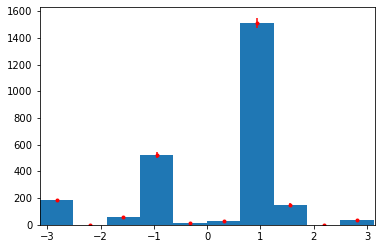

In [34]:
plot_dihedrals(dihedrals)

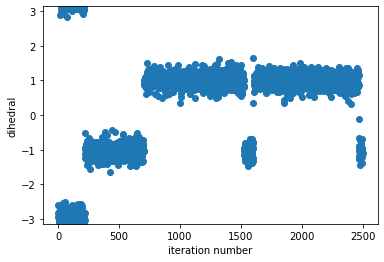

In [35]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

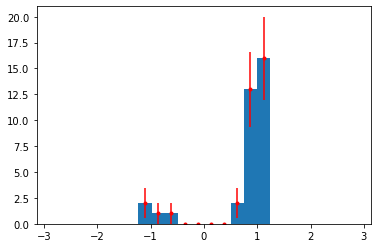

In [36]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)

## Analyze vanilla MD dihedrals run on r-htf with flattened

In [26]:
with open("/data/chodera/zhangi/perses_benchmark/neq/7/46/46_solvent.pickle", 'rb') as f:
    htf = pickle.load(f)

In [27]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/7/46/46_solvent_equil_hybrid_0_20ns.npy", 'rb') as f:
    pos = np.load(f)


In [28]:
pos[2499]

array([[1.47153989, 0.92252448, 2.21398305],
       [1.58534124, 0.95621094, 2.26498964],
       [1.39395384, 0.81133344, 2.27959079],
       ...,
       [1.64425312, 1.06863018, 1.87284079],
       [1.64790655, 0.9420891 , 2.00561583],
       [1.52551237, 0.9297597 , 1.88027944]])

In [29]:
htf._topology_proposal.old_topology

<Topology; 3 chains, 512 residues, 1549 atoms, 1039 bonds>

In [30]:
# Get old positions from hybrid
pos_old = np.empty(shape=(2500, htf._topology_proposal.old_topology.getNumAtoms(), 3))
for i, p in tqdm(enumerate(pos[:2500])):
    pos_old[i] = htf.old_positions(p *unit.nanometers)

2500it [00:45, 55.21it/s]


In [31]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)

In [32]:
traj = md.Trajectory(np.array(pos_old), old_top)

In [33]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom, atom.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 1
<Atom 1 (O) of chain 0 residue 0 (ACE)> 2
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 4
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 5
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (THR)> 7
<Atom 7 (CA) of chain 0 residue 1 (THR)> 8
<Atom 8 (C) of chain 0 residue 1 (THR)> 9
<Atom 9 (O) of chain 0 residue 1 (THR)> 10
<Atom 10 (CB) of chain 0 residue 1 (THR)> 11
<Atom 11 (CG2) of chain 0 residue 1 (THR)> 12
<Atom 12 (OG1) of chain 0 residue 1 (THR)> 13
<Atom 13 (H) of chain 0 residue 1 (THR)> 14
<Atom 14 (HA) of chain 0 residue 1 (THR)> 15
<Atom 15 (HB) of chain 0 residue 1 (THR)> 16
<Atom 16 (HG1) of chain 0 residue 1 (THR)> 17
<Atom 17 (HG21) of chain 0 residue 1 (THR)> 18
<Atom 18 (HG22) of chain 0 residue 1 (THR)> 19
<Atom 19 (HG23) of chain 0 residue 1 (THR)> 20
<Atom 20 (N) of chain 0 residue 2 (NME)> 21
<Atom 21 (C) of chain 0 residue 2 (NME)> 22
<Atom 22 (H) of chain 0 res

<Atom 844 (H2) of chain 1 residue 275 (HOH)> 845
<Atom 845 (O) of chain 1 residue 276 (HOH)> 846
<Atom 846 (H1) of chain 1 residue 276 (HOH)> 847
<Atom 847 (H2) of chain 1 residue 276 (HOH)> 848
<Atom 848 (O) of chain 1 residue 277 (HOH)> 849
<Atom 849 (H1) of chain 1 residue 277 (HOH)> 850
<Atom 850 (H2) of chain 1 residue 277 (HOH)> 851
<Atom 851 (O) of chain 1 residue 278 (HOH)> 852
<Atom 852 (H1) of chain 1 residue 278 (HOH)> 853
<Atom 853 (H2) of chain 1 residue 278 (HOH)> 854
<Atom 854 (O) of chain 1 residue 279 (HOH)> 855
<Atom 855 (H1) of chain 1 residue 279 (HOH)> 856
<Atom 856 (H2) of chain 1 residue 279 (HOH)> 857
<Atom 857 (O) of chain 1 residue 280 (HOH)> 858
<Atom 858 (H1) of chain 1 residue 280 (HOH)> 859
<Atom 859 (H2) of chain 1 residue 280 (HOH)> 860
<Atom 860 (O) of chain 1 residue 281 (HOH)> 861
<Atom 861 (H1) of chain 1 residue 281 (HOH)> 862
<Atom 862 (H2) of chain 1 residue 281 (HOH)> 863
<Atom 863 (O) of chain 1 residue 282 (HOH)> 864
<Atom 864 (H1) of chain 1 r

In [34]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 7, 10, 12]]))

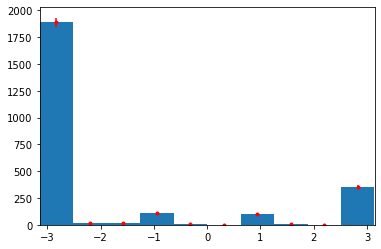

In [35]:
plot_dihedrals(dihedrals)

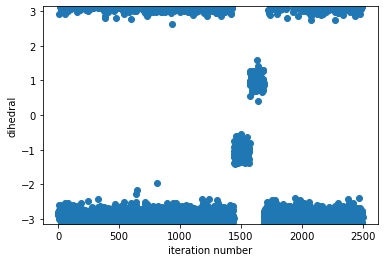

In [36]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

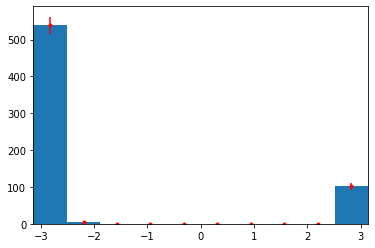

In [37]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)

## Analyze vanilla MD dihedrals run on r-htf with flattened - at ALA endstate

In [5]:
with open("/data/chodera/zhangi/perses_benchmark/neq/7/47/47_solvent.pickle", 'rb') as f:
    htf = pickle.load(f)

In [7]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/7/47/47_solvent_equil_hybrid_1_20ns.npy", 'rb') as f:
    pos = np.load(f)


In [8]:
pos[2499]

array([[1.70138112, 0.22584455, 0.70574458],
       [1.58450935, 0.20347093, 0.692732  ],
       [1.7902364 , 0.10645888, 0.73681991],
       ...,
       [1.83418943, 0.59963076, 0.80511581],
       [1.87671154, 0.58434621, 0.6390041 ],
       [1.74079412, 0.68918746, 0.68181375]])

In [9]:
htf._topology_proposal.old_topology

<Topology; 3 chains, 512 residues, 1549 atoms, 1039 bonds>

In [11]:
# Get old and new positions from hybrid
pos_old = np.empty(shape=(2500, htf._topology_proposal.old_topology.getNumAtoms(), 3))
pos_new = np.empty(shape=(2500, htf._topology_proposal.new_topology.getNumAtoms(), 3))
for i, p in tqdm(enumerate(pos[:2500])):
    pos_old[i] = htf.old_positions(p *unit.nanometers)
    pos_new[i] = htf.new_positions(p *unit.nanometers)

2500it [01:32, 27.15it/s]


### THR (off atoms)

In [12]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)

In [13]:
traj = md.Trajectory(np.array(pos_old), old_top)

In [14]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom, atom.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 1
<Atom 1 (O) of chain 0 residue 0 (ACE)> 2
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 4
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 5
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (THR)> 7
<Atom 7 (CA) of chain 0 residue 1 (THR)> 8
<Atom 8 (C) of chain 0 residue 1 (THR)> 9
<Atom 9 (O) of chain 0 residue 1 (THR)> 10
<Atom 10 (CB) of chain 0 residue 1 (THR)> 11
<Atom 11 (CG2) of chain 0 residue 1 (THR)> 12
<Atom 12 (OG1) of chain 0 residue 1 (THR)> 13
<Atom 13 (H) of chain 0 residue 1 (THR)> 14
<Atom 14 (HA) of chain 0 residue 1 (THR)> 15
<Atom 15 (HB) of chain 0 residue 1 (THR)> 16
<Atom 16 (HG1) of chain 0 residue 1 (THR)> 17
<Atom 17 (HG21) of chain 0 residue 1 (THR)> 18
<Atom 18 (HG22) of chain 0 residue 1 (THR)> 19
<Atom 19 (HG23) of chain 0 residue 1 (THR)> 20
<Atom 20 (N) of chain 0 residue 2 (NME)> 21
<Atom 21 (C) of chain 0 residue 2 (NME)> 22
<Atom 22 (H) of chain 0 res

In [15]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 7, 10, 12]]))

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

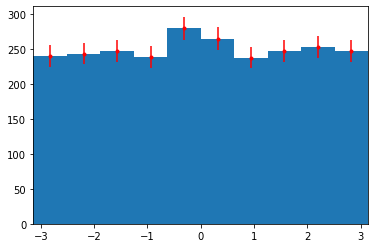

In [16]:
plot_dihedrals(dihedrals)

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


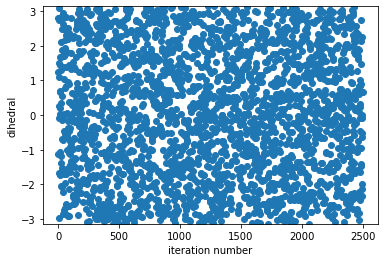

In [17]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

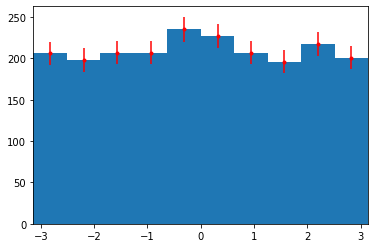

In [18]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)

### ALA (on atoms)

In [19]:
new_top = md.Topology.from_openmm(htf._topology_proposal.new_topology)

In [20]:
traj = md.Trajectory(np.array(pos_new), new_top)

In [21]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom, atom.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 1
<Atom 1 (O) of chain 0 residue 0 (ACE)> 2
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 4
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 5
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (ALA)> 7
<Atom 7 (CA) of chain 0 residue 1 (ALA)> 8
<Atom 8 (C) of chain 0 residue 1 (ALA)> 9
<Atom 9 (O) of chain 0 residue 1 (ALA)> 10
<Atom 10 (CB) of chain 0 residue 1 (ALA)> 11
<Atom 11 (H) of chain 0 residue 1 (ALA)> 12
<Atom 12 (HA) of chain 0 residue 1 (ALA)> 13
<Atom 13 (HB1) of chain 0 residue 1 (ALA)> 14
<Atom 14 (HB2) of chain 0 residue 1 (ALA)> 15
<Atom 15 (HB3) of chain 0 residue 1 (ALA)> 16
<Atom 16 (N) of chain 0 residue 2 (NME)> 17
<Atom 17 (C) of chain 0 residue 2 (NME)> 18
<Atom 18 (H) of chain 0 residue 2 (NME)> 19
<Atom 19 (H1) of chain 0 residue 2 (NME)> 20
<Atom 20 (H2) of chain 0 residue 2 (NME)> 21
<Atom 21 (H3) of chain 0 residue 2 (NME)> 22
<Atom 22 (O) of chain 1 residue 3 

In [22]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 7, 10, 13]]))

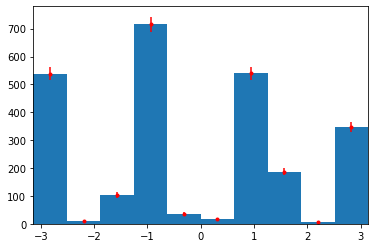

In [23]:
plot_dihedrals(dihedrals)

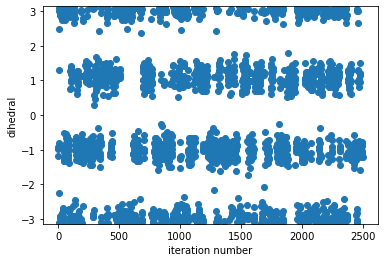

In [24]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

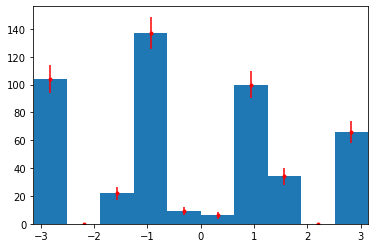

In [25]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)

## Analyze vanilla MD dihedrals run on r-htf with flattened - at THR endstate (vacuum)

In [4]:
with open("/data/chodera/zhangi/perses_benchmark/neq/7/48/48_vacuum_0.pickle", 'rb') as f:
    htf = pickle.load(f)

In [5]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/7/48/48_vacuum_equil_hybrid_0_20ns.npy", 'rb') as f:
    pos = np.load(f)


In [6]:
pos.shape

(2501, 30, 3)

In [7]:
# Get old and new positions from hybrid
pos_old = np.empty(shape=(2500, htf._topology_proposal.old_topology.getNumAtoms(), 3))
pos_new = np.empty(shape=(2500, htf._topology_proposal.new_topology.getNumAtoms(), 3))
for i, p in tqdm(enumerate(pos[:2500])):
    pos_old[i] = htf.old_positions(p *unit.nanometers)
    pos_new[i] = htf.new_positions(p *unit.nanometers)

2500it [00:03, 662.04it/s]


### THR (on atoms)

In [8]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)

In [9]:
traj = md.Trajectory(np.array(pos_old), old_top)

In [10]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom, atom.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 1
<Atom 1 (O) of chain 0 residue 0 (ACE)> 2
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 4
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 5
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (THR)> 7
<Atom 7 (CA) of chain 0 residue 1 (THR)> 8
<Atom 8 (C) of chain 0 residue 1 (THR)> 9
<Atom 9 (O) of chain 0 residue 1 (THR)> 10
<Atom 10 (CB) of chain 0 residue 1 (THR)> 11
<Atom 11 (CG2) of chain 0 residue 1 (THR)> 12
<Atom 12 (OG1) of chain 0 residue 1 (THR)> 13
<Atom 13 (H) of chain 0 residue 1 (THR)> 14
<Atom 14 (HA) of chain 0 residue 1 (THR)> 15
<Atom 15 (HB) of chain 0 residue 1 (THR)> 16
<Atom 16 (HG1) of chain 0 residue 1 (THR)> 17
<Atom 17 (HG21) of chain 0 residue 1 (THR)> 18
<Atom 18 (HG22) of chain 0 residue 1 (THR)> 19
<Atom 19 (HG23) of chain 0 residue 1 (THR)> 20
<Atom 20 (N) of chain 0 residue 2 (NME)> 21
<Atom 21 (C) of chain 0 residue 2 (NME)> 22
<Atom 22 (H) of chain 0 res

In [11]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 7, 10, 12]]))

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

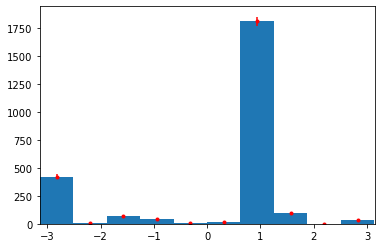

In [12]:
plot_dihedrals(dihedrals)

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


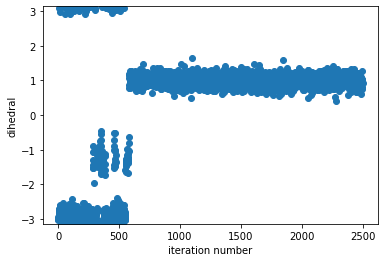

In [13]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

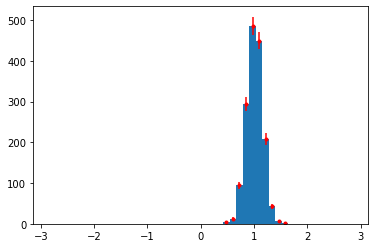

In [14]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)

### ALA (off atoms)

In [15]:
new_top = md.Topology.from_openmm(htf._topology_proposal.new_topology)

In [16]:
traj = md.Trajectory(np.array(pos_new), new_top)

In [17]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom, atom.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 1
<Atom 1 (O) of chain 0 residue 0 (ACE)> 2
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 3
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 4
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 5
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 6
<Atom 6 (N) of chain 0 residue 1 (ALA)> 7
<Atom 7 (CA) of chain 0 residue 1 (ALA)> 8
<Atom 8 (C) of chain 0 residue 1 (ALA)> 9
<Atom 9 (O) of chain 0 residue 1 (ALA)> 10
<Atom 10 (CB) of chain 0 residue 1 (ALA)> 11
<Atom 11 (H) of chain 0 residue 1 (ALA)> 12
<Atom 12 (HA) of chain 0 residue 1 (ALA)> 13
<Atom 13 (HB1) of chain 0 residue 1 (ALA)> 14
<Atom 14 (HB2) of chain 0 residue 1 (ALA)> 15
<Atom 15 (HB3) of chain 0 residue 1 (ALA)> 16
<Atom 16 (N) of chain 0 residue 2 (NME)> 17
<Atom 17 (C) of chain 0 residue 2 (NME)> 18
<Atom 18 (H) of chain 0 residue 2 (NME)> 19
<Atom 19 (H1) of chain 0 residue 2 (NME)> 20
<Atom 20 (H2) of chain 0 residue 2 (NME)> 21
<Atom 21 (H3) of chain 0 residue 2 (NME)> 22


In [18]:
dihedrals = md.compute_dihedrals(traj, np.array([[6, 7, 10, 13]]))

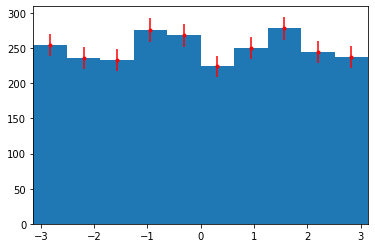

In [19]:
plot_dihedrals(dihedrals)

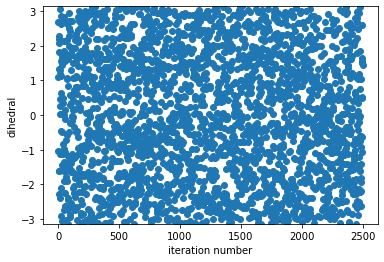

In [20]:
uncorrelated_indices = plot_time_series(dihedrals, len(dihedrals))

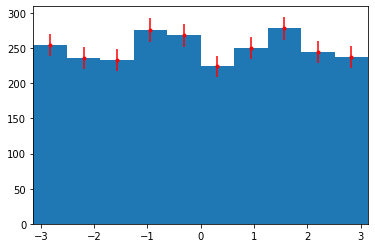

In [21]:
plot_dihedrals_uncorrelated(dihedrals, uncorrelated_indices)